# Import Libraries

In [171]:
# Import necessary libraries and set up the class for constants
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from scipy.optimize import fsolve
from scipy.optimize import brentq

# Define a data class to hold all the constants needed for the function f(θ)
@dataclass
class Constants:
    l1: float
    l2: float
    l3: float
    gamma: float
    x1: float
    x2: float
    y2: float
    p1: float
    p2: float
    p3: float

# PROBLEM 1
---

#### Write a python function for f($\theta$). The parameters $L_1, L_2, L_3, \gamma, x_1, x_2, y_2$ are fixed constants, and the strut lengths $p_1, p_2, p_3$ will be known for a given pose. To test your code, set the parameters $L_1 = 2$, $L_2 = L_3 = \sqrt{2}$, $\gamma = \pi/2$, and $p_1 = p_2 = p_3 = \sqrt{5}$. Then, substituting $\theta = -\pi/4$ or $\theta = \pi/4$, should make $f(\theta) = 0$.

In [172]:
# Define the function f(θ) that calculates based on given constants and angle θ
def f(theta, constants):
    """
    Calculates a value based on the given angle theta and constants object.

    Parameters:
    theta (float): The angle in radians.
    constants (Constants): An object containing the necessary constants.

    Returns:
    float: The calculated result.
    """
    l1, l2, l3 = constants.l1, constants.l2, constants.l3
    gamma = constants.gamma
    x1, x2, y2 = constants.x1, constants.x2, constants.y2
    p1, p2, p3 = constants.p1, constants.p2, constants.p3

    a2 = l3 * np.cos(theta) - x1 
    b2 = l3 * np.sin(theta)
    a3 = l2 * np.cos(theta + gamma) - x2
    b3 = l2 * np.sin(theta + gamma) - y2
    d = 2 * (a2 * b3 - b2 * a3)
    
    n1 = b3 * (p2**2 - p1**2 - a2**2 - b2**2) - b2 * (p3**2 - p1**2 - a3**2 - b3**2)
    n2 = -a3 * (p2**2 - p1**2 - a2**2 - b2**2) + a2 * (p3**2 - p1**2 - a3**2 - b3**2)
    
    return n1**2 + n2**2 - p1**2 * d**2

## Test function $f(\theta)$

In [175]:
# Define constants and evaluate f(θ) at a specific angle θ = π/4 for testing purposes
constants = Constants(
    l1=2, 
    l2=np.sqrt(2),
    l3=np.sqrt(2),
    gamma=np.pi / 2, 
    x1=4, 
    x2=0, 
    y2=4, 
    p1=np.sqrt(5),
    p2=np.sqrt(5), 
    p3=np.sqrt(5)
)

theta = np.pi / 4
# Evaluate 
result = f(theta, constants)
print(f'f(θ=π/4) = {result}')

f(θ=π/4) = -4.547473508864641e-13


# PROBLEM 2
---

#### Plot $f(\theta)$ on $[-\pi, \pi]$

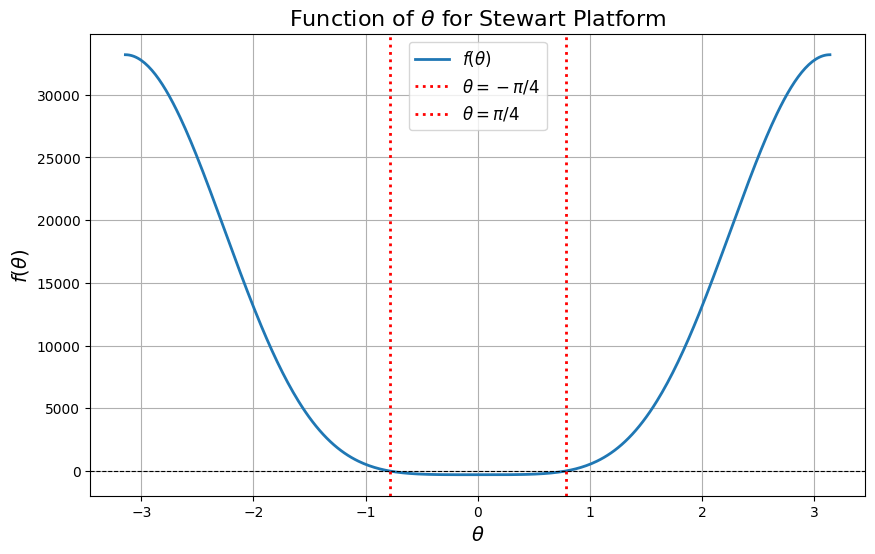

In [163]:
# Generate a range of theta values and compute f(θ) for each value to visualize the function
theta_values = np.linspace(-np.pi, np.pi, 400)
results = [f(theta, constants) for theta in theta_values]

# Plot f(θ) over the range of theta values
plt.figure(figsize=(10, 6))
plt.plot(theta_values, results, label=r'$f(\theta)$', linewidth=2)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(-np.pi/4, color='red', linestyle=':', linewidth=2, label=r'$\theta = -\pi/4$')
plt.axvline(np.pi/4, color='red', linestyle=':', linewidth=2, label=r'$\theta = \pi/4$')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$f(\theta)$', fontsize=14)
plt.title(r'Function of $\theta$ for Stewart Platform', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

# PROBLEM 3
---

#### Reproduce Figure 1.15. Plot a red triangle with vertices  $(u_1, v_1), (u_2, v_2), (u_3, v_3)$ and place small blue circles at the strut anchor points $(0,0), (x_1, 0), (x_2, y_2)$:


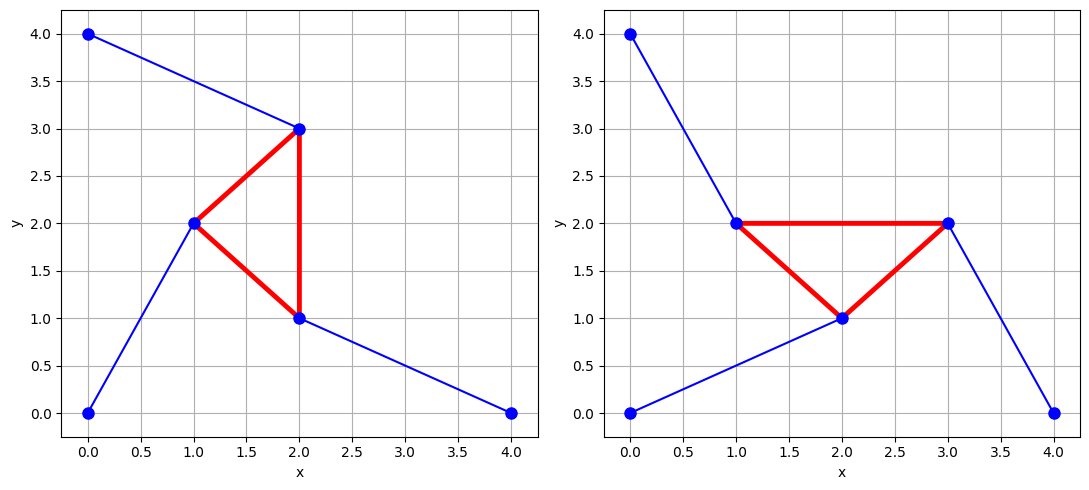

In [164]:
# Define helper functions for calculating x, y coordinates and plotting the Stewart platform triangle
def get_x_y(theta, constants):
    """
    Returns the coordinates x and y for the given angle theta and constants object.

    Parameters:
    theta (float): The angle in radians.
    constants (Constants): An object containing the necessary constants.
    
    Returns:
    tuple: The coordinates (x, y).
    """
    l1, l2, l3 = constants.l1, constants.l2, constants.l3
    gamma = constants.gamma
    x1, x2, y2 = constants.x1, constants.x2, constants.y2
    p1, p2, p3 = constants.p1, constants.p2, constants.p3

    a2 = l3 * np.cos(theta) - x1 
    b2 = l3 * np.sin(theta)
    a3 = l2 * np.cos(theta + gamma) - x2
    b3 = l2 * np.sin(theta + gamma) - y2
    
    d = 2 * (a2 * b3 - b2 * a3)
    n1 = b3 * (p2**2 - p1**2 - a2**2 - b2**2) - b2 * (p3**2 - p1**2 - a3**2 - b3**2)
    n2 = -a3 * (p2**2 - p1**2 - a2**2 - b2**2) + a2 * (p3**2 - p1**2 - a3**2 - b3**2)
    
    x = n1 / d
    y = n2 / d
    
    return x, y


def get_points(x, y, theta, constants):
    """
    Calculate the three points (vertices) of the triangle in the Stewart platform based on x, y, and θ.

    Parameters:
    x (float): The x-coordinate.
    y (float): The y-coordinate.
    theta (float): The angle in radians.
    constants (Constants): Object containing the necessary constants.

    Returns:
    list: A list containing the three vertices (l1_point, l2_point, l3_point) of the triangle.
    """
    l1, l2, l3 = constants.l1, constants.l2, constants.l3
    gamma = constants.gamma

    # First vertex (base point)
    l1_point = (x, y)
    
    # Second vertex of the triangle
    l2_x = x + (l3 * np.cos(theta))
    l2_y = y + (l3 * np.sin(theta))
    l2_point = (np.round(l2_x, 3), np.round(l2_y))  # Rounded to 3 decimal places for clarity
    
    # Third vertex of the triangle
    l3_x = x + (l2 * np.cos(theta + gamma))
    l3_y = y + (l2 * np.sin(theta + gamma))
    l3_point = (np.round(l3_x), np.round(l3_y))  # Rounded to 3 decimal places for clarity
    
    return [l1_point, l2_point, l3_point]

def get_anchor_points(constants):
    """
    Get the anchor points for the Stewart platform based on the constants.

    Parameters:
    constants (Constants): Object containing the necessary constants.

    Returns:
    list: A list of tuples representing the anchor points.
    """
    x1, x2, y2 = constants.x1, constants.x2, constants.y2
    
    return [(0, 0), (x1, 0), (x2, y2)]

def plot_triangle(ax, points, anchor_points, x_limits=None, y_limits=None, x_step=None, y_step=None):
    """
    Plots a triangle given the points and anchor points on the provided axis.

    Parameters:
    ax: The axis on which to plot the triangle.
    points: The points of the triangle (list of 3 points).
    anchor_points: The anchor points (list of 2 or more points).
    x_limits (tuple, optional): Tuple specifying the x-axis limits (x_min, x_max).
    y_limits (tuple, optional): Tuple specifying the y-axis limits (y_min, y_max).
    x_step (float, optional): Step size for the x-axis grid.
    y_step (float, optional): Step size for the y-axis grid.

    Returns:
    None
    """
    points = np.array(points)
    anchor_points = np.array(anchor_points)
    
    # Extract x and y coordinates for the triangle points
    x_coords = points[:, 0]
    y_coords = points[:, 1]
    
    # Close the triangle by appending the first point at the end
    x_closed = np.append(x_coords, x_coords[0])
    y_closed = np.append(y_coords, y_coords[0])
    
    # Plot the triangle with red lines
    ax.plot(x_closed, y_closed, 'r-', linewidth=3.5)
    
    # Plot blue dots at the triangle vertices
    ax.plot(x_coords, y_coords, 'bo', markersize=8)
    
    # Plot lines from anchor points to triangle points
    for i, anchor in enumerate(anchor_points):
        if i < len(points):  # Ensure we stay within bounds
            ax.plot([anchor[0], points[i, 0]], [anchor[1], points[i, 1]], 'b-', linewidth=1.5)
    
    # Plot blue dots at the anchor points
    ax.plot(anchor_points[:, 0], anchor_points[:, 1], 'bo', markersize=8)
    
    # Set axis labels
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
    # Set x-axis limits if provided
    if x_limits is not None:
        ax.set_xlim(x_limits)
    # Set y-axis limits if provided
    if y_limits is not None:
        ax.set_ylim(y_limits)
    # Set grid step increments if limits are provided
    if x_step is not None and x_limits is not None:
        ax.set_xticks(np.arange(x_limits[0], x_limits[1] + x_step, x_step))  # Adjust x-axis ticks
    if y_step is not None and y_limits is not None:
        ax.set_yticks(np.arange(y_limits[0], y_limits[1] + y_step, y_step))  # Adjust y-axis ticks
    
    # Add grid for better visualization
    ax.grid(True)
    
# Create a plot to visualize the Stewart platform configurations for two different angles
theta = np.pi / 4
theta_negative = -np.pi / 4

# Calculate the coordinates and points for the triangles
x, y = get_x_y(theta_negative, constants)  
points1 = get_points(x, y, theta_negative, constants) 
anchor_points = get_anchor_points(constants)

x, y = get_x_y(theta, constants)  
points2 = get_points(x, y, theta, constants)  

# Create side-by-side subplots to visualize the two triangles
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

# Plot the triangles on each subplot
plot_triangle(axes[0], points1, anchor_points, x_limits=(-0.25, 4.25), y_limits=(-0.25, 4.25))
plot_triangle(axes[1], points2, anchor_points, x_limits=(-0.25, 4.25), y_limits=(-0.25, 4.25))

plt.tight_layout()
plt.savefig('stewart_platform_two_triangles_plot.png', dpi=300, bbox_inches='tight')


plt.show()

# PROBLEM 4
---

#### Solve the forward kinematics problem for the planar Stewart platform specified by $x_1 = 5$, $(x_2, y_2) = (0,6)$, $L_1 = L_3 = 3$, $L_2 = 3\sqrt{2}$, $\gamma = \pi / 4$, $p_1 = p_2 = 5$, $p_3 = 3$. Begin by plotting $f(\theta)$. Use an equation solver of your choice to find all four poses (roots of $f(\theta)$), and plot them. Check your answers by verifying that $p_1, p_2, p_3$ are the lengths of the struts in your plot.\n

#### 4A)


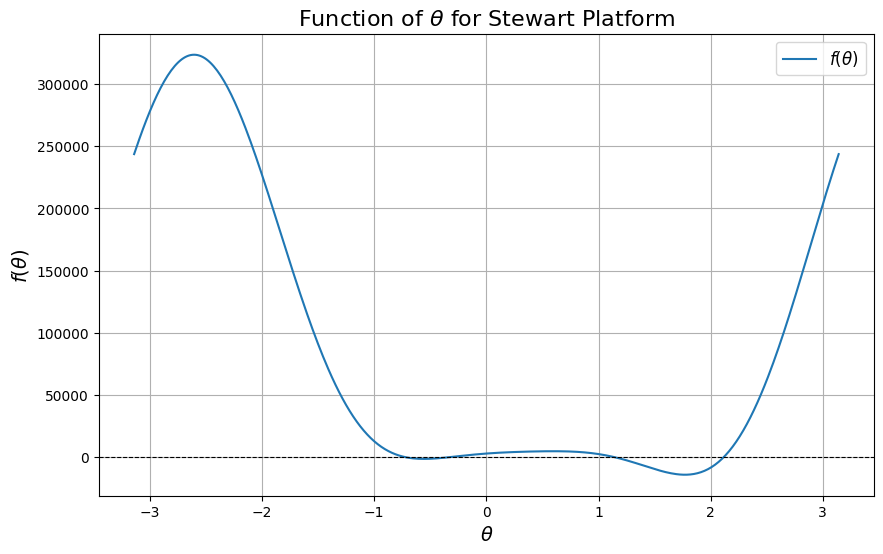

In [165]:

# Create new constants object
constants = Constants(
    l1=3, 
    l2=3 * np.sqrt(2), 
    l3=3, 
    gamma=np.pi / 4,  
    x1=5, 
    x2=0, 
    y2=6,  
    p1=5, 
    p2=5, 
    p3=3
)

# Generate an array of θ values between -π and π
theta_values = np.linspace(-np.pi, np.pi, 400)

# Plot the function f(θ) over the range of θ values using the given constants
plt.figure(figsize=(10, 6))
plt.plot(theta_values, f(theta_values, constants), label=r'$f(\theta)$') 
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$f(\theta)$', fontsize=14)
plt.title(r'Function of $\theta$ for Stewart Platform', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)



plt.show()


#### 4B)

The roots of f(θ) in the interval are : [-0.7208492  -0.33100518  1.14368552  2.11590901]
For root -0.721, strut lengths are: [5. 5. 3.]
Expected: p1=5, p2=5, p3=3

For root -0.331, strut lengths are: [5. 5. 3.]
Expected: p1=5, p2=5, p3=3

For root 1.144, strut lengths are: [5. 5. 3.]
Expected: p1=5, p2=5, p3=3

For root 2.116, strut lengths are: [5. 5. 3.]
Expected: p1=5, p2=5, p3=3



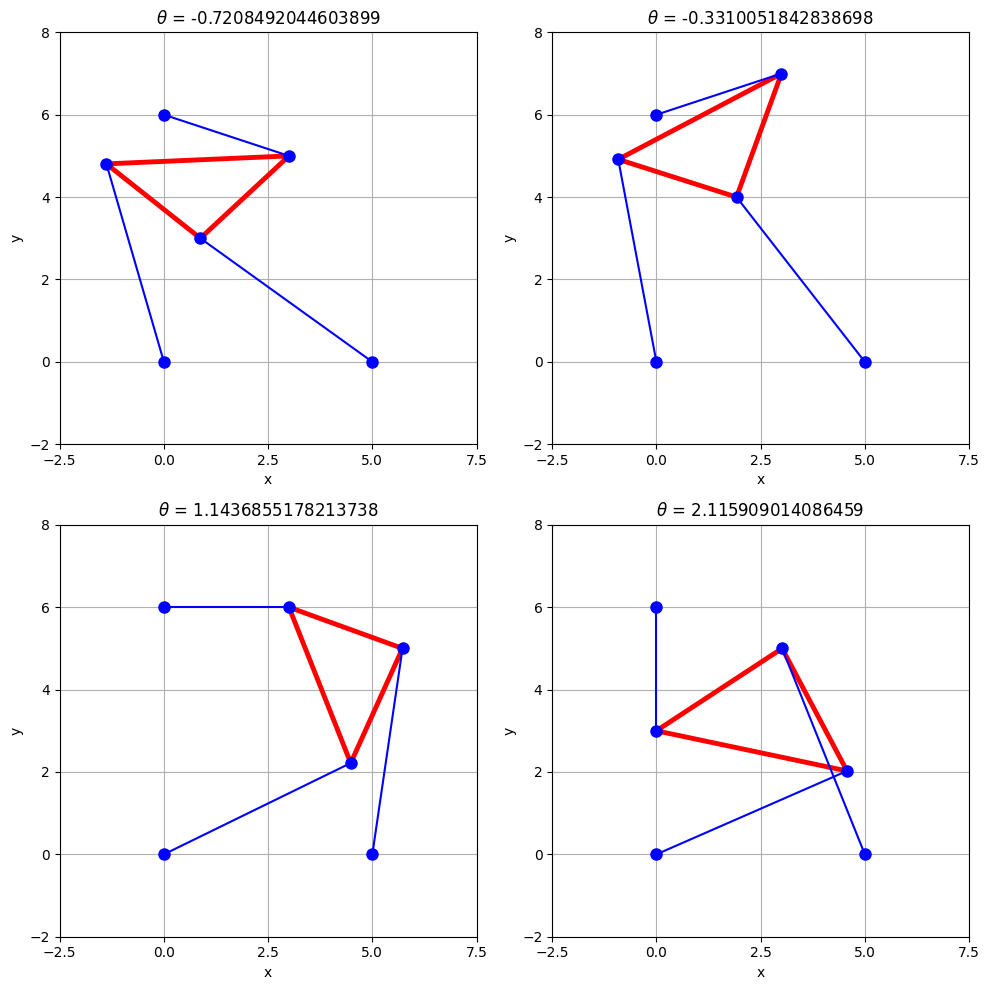

In [166]:
# Function to find roots of f(θ) using fsolve
def find_roots(constants, initial_guesses):
    """
    Finds roots of f(θ) using different initial guesses and the fsolve method.
    
    Parameters:
    constants (Constants): Object containing the necessary constants.
    initial_guesses (list or array): List of initial guesses for fsolve to start from.
    
    Returns:
    list: A list of unique roots.
    """

    # Create an empty list to store the roots found    
    roots = []
    # Iterate over each initial guess and find the root using fsolve
    for guess in initial_guesses:
        root = fsolve(f, guess, args=(constants), xtol=1e-12)[0] # Find root for each guess
        roots.append(root) # Append the found root to the list
    
    # Return only unique roots to avoid duplicates
    unique_roots = np.unique(roots)
    return unique_roots

# Define initial guesses for fsolve to start the root-finding process
initial_guesses = [- 1, np.pi / 3, .5, 2] 

# Find and print the roots using the initial guesses
roots = find_roots(constants, initial_guesses)
print(f"The roots of f(θ) in the interval are : {roots}")

# Function to calculate the length of the struts
def calculate_strut_lengths(points, anchor_points):
    lengths = []
    # Loop through the 3 points and calculate the Euclidean distance to each corresponding anchor point
    for i in range(3):
        length = np.sqrt((points[i][0] - anchor_points[i][0])**2 + (points[i][1] - anchor_points[i][1])**2)
        lengths.append(length) # Append each calculated length to the list
    return lengths


# Create a 2x2 grid of subplots to visualize the four roots and their corresponding triangles
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten() # Flatten the 2D array of subplots into a 1D array for easier access

# Get the anchor points for the Stewart platform
anchor_points = get_anchor_points(constants)

# Loop through up to four roots and plot the corresponding triangles
for i, theta in enumerate(roots[:4]):  
    x, y = get_x_y(theta, constants)
    points = get_points(x, y, theta, constants)
    
    # Plot the triangle in the corresponding subplot with custom limits
    plot_triangle(axes[i], points, anchor_points, x_limits=(-2.5, 7.5), y_limits=(-2, 7), x_step=2.5, y_step=2)
    axes[i].set_title(rf"$\theta$ = {theta}")

    # Calculate and verify strut lengths
    lengths = calculate_strut_lengths(points, anchor_points)
    print(f"For root {np.round(theta, 3)}, strut lengths are: {np.round(lengths)}")
    print(f"Expected: p1={constants.p1}, p2={constants.p2}, p3={constants.p3}\n")

# Turn off any unused subplots if fewer than four roots
for j in range(len(roots), 4):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()


plt.show()

# PROBLEM 5
---

#### Change strut length to $p_2 = 7$ and re-solve the problem. For these parameters, there are six poses.

#### 5A)

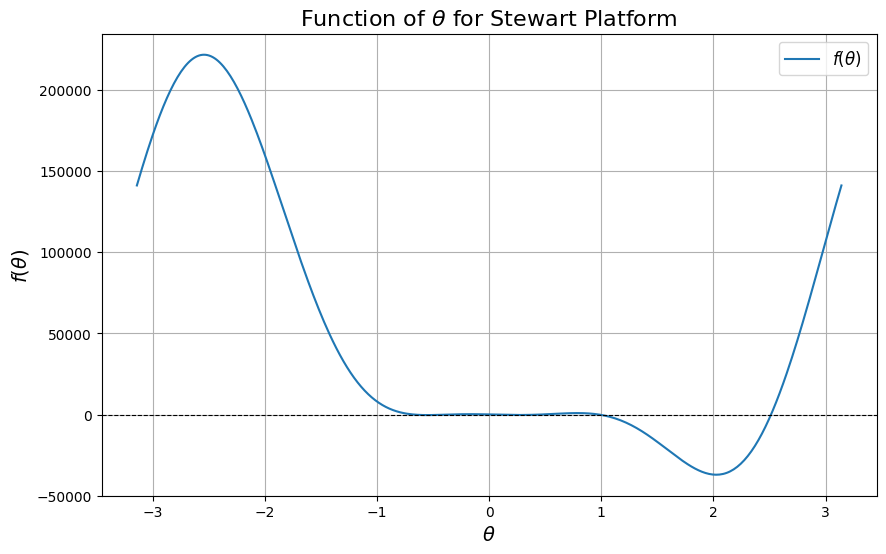

In [167]:
# Update the constants to reflect the new strut length p2 = 7
constants = Constants(
    l1=3, 
    l2=3 * np.sqrt(2), 
    l3=3, 
    gamma=np.pi / 4, 
    x1=5, 
    x2=0, 
    y2=6,  
    p1=5, 
    p2=7, 
    p3=3
)

# Generate the θ values again to visualize the updated f(θ)
theta_values = np.linspace(-np.pi, np.pi, 400)

# Plot f(θ) for the new strut length
plt.figure(figsize=(10, 6))
plt.plot(theta_values, f(theta_values, constants), label=r'$f(\theta)$')  
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$f(\theta)$', fontsize=14)
plt.title(r'Function of $\theta$ for Stewart Platform', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)


plt.show()


#### 5B)

The roots of f(θ) in the interval are : [-0.67315749 -0.35474027  0.03776676  0.45887818  0.9776729   2.5138528 ]
For root -0.673, strut lengths are: [5. 7. 3.]
Expected: p1=5, p2=7, p3=3

For root -0.355, strut lengths are: [5. 7. 3.]
Expected: p1=5, p2=7, p3=3

For root 0.038, strut lengths are: [5. 7. 3.]
Expected: p1=5, p2=7, p3=3

For root 0.459, strut lengths are: [5. 7. 3.]
Expected: p1=5, p2=7, p3=3

For root 0.978, strut lengths are: [5. 7. 3.]
Expected: p1=5, p2=7, p3=3

For root 2.514, strut lengths are: [5. 7. 3.]
Expected: p1=5, p2=7, p3=3



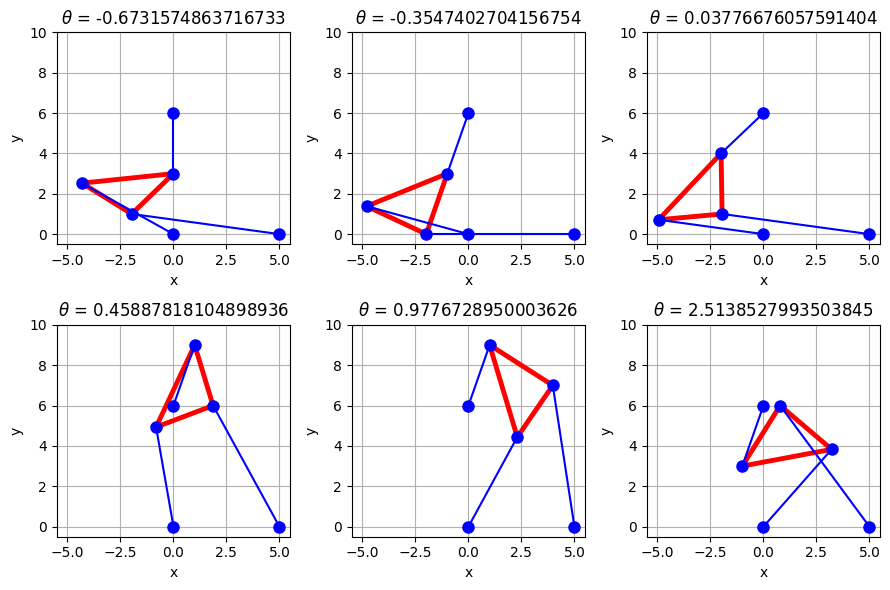

In [168]:
# Provide new initial guesses to find six distinct roots for this configuration
initial_guesses = [-.7, -.4, .01, .4, .9, 2.5 ]  # Customize this list

# Find and print the roots using the initial guesses
roots = find_roots(constants, initial_guesses)
print(f"The roots of f(θ) in the interval are : {roots}")

# Set up the 2x3 grid for plotting the six poses
fig, axes = plt.subplots(2, 3, figsize=(9, 6))  # Create a 2x3 grid
axes = axes.flatten()  # Flatten the 2D array of axes for easier access

# Get the anchor points
anchor_points = get_anchor_points(constants)

# Loop through the six roots and plot each pose
for i, theta in enumerate(roots[:6]):  
    x, y = get_x_y(theta, constants)
    points = get_points(x, y, theta, constants)
    # Plot the triangle in the corresponding subplot with custom limits
    plot_triangle(axes[i], points, anchor_points, x_limits=(-5.5, 5.5), y_limits=(-.5, 10), )
    axes[i].set_title(rf"$\theta$ = {theta}")

    # Calculate and verify strut lengths
    lengths = calculate_strut_lengths(points, anchor_points)
    print(f"For root {np.round(theta, 3)}, strut lengths are: {np.round(lengths)}")
    print(f"Expected: p1={constants.p1}, p2={constants.p2}, p3={constants.p3}\n")

# Turn off any unused subplots (though in this case, we should have exactly 6)
for j in range(len(roots), 6):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()


plt.show()

# PROBLEM 6
---

#### Find a strut length $p_2$, with the rest of the parameters as in Step 4, for which there are only two poses.


C:\Users\nater\AppData\Local\Temp\ipykernel_13900\20724526.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=10)
C:\Users\nater\AppData\Local\Temp\ipykernel_13900\20724526.py:29: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  root = fsolve(f, guess, args=(constants))[0]
C:\Users\nater\AppData\Local\Temp\ipykernel_13900\20724526.py:29: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  root = fsolve(f, guess, args=(constants))[0]


p2 = -1.000: Found 0 valid roots: []
p2 = 0.000: Found 0 valid roots: []
p2 = 1.000: Found 0 valid roots: []
p2 = 2.000: Found 0 valid roots: []
p2 = 3.000: Found 0 valid roots: []
p2 = 4.000: Found 2 valid roots: [1.331642 1.777514]
Found p2=4 with two distinct roots: [1.331642 1.777514]


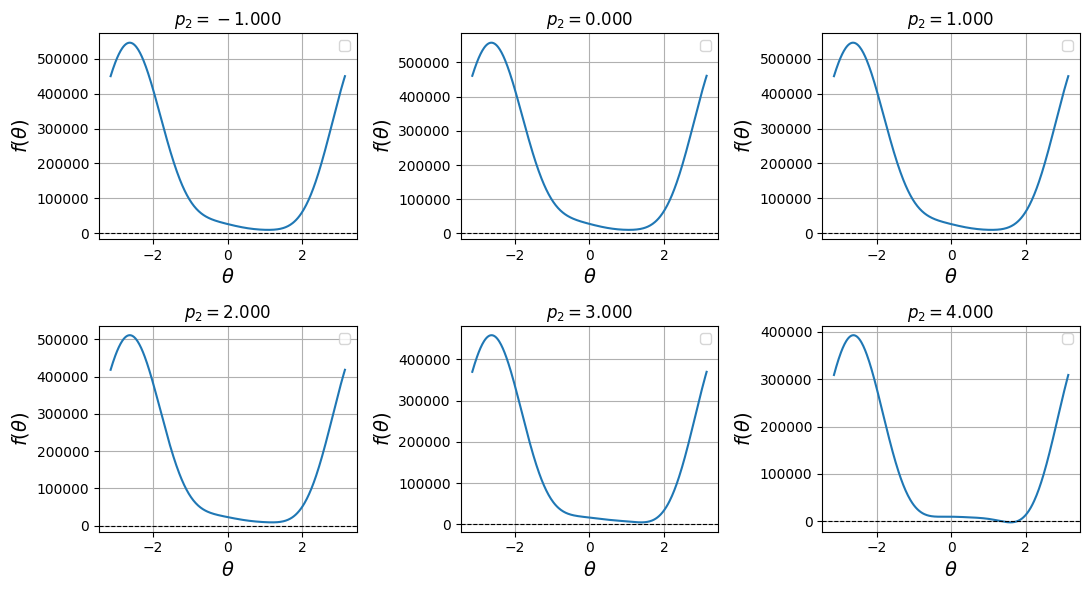

In [169]:
# Set a threshold for considering a valid root (how close to zero we want f(theta) to be)
ROOT_THRESHOLD = 1e-6

# Function to find roots for a given p2, and check if they are valid
def find_roots_for_p2(p2_value, constants, initial_guesses, ax=None):
    """
    Adjusts p2 in the constants object, finds the roots, and returns the number of unique roots.
    Also plots f(theta) for the current p2 value on the provided axis.
    """
    # Update p2 in constants
    constants.p2 = p2_value
    
    # Generate theta values and compute f(theta)
    theta_values = np.linspace(-np.pi, np.pi, 400)
    f_values = [f(theta, constants) for theta in theta_values]
    
    # Plot f(theta) for the current p2 value on the provided axis
    ax.plot(theta_values, f_values,)
    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
    ax.set_xlabel(r'$\theta$', fontsize=14)
    ax.set_ylabel(r'$f(\theta)$', fontsize=14)
    ax.set_title(fr'$p_2 = {p2_value:.3f}$')
    ax.legend(fontsize=10)
    ax.grid(True)
    
    # Find the roots for the given p2 value
    roots = []
    for guess in initial_guesses:
        root = fsolve(f, guess, args=(constants))[0]
        
        # Check if the found root is valid (i.e., f(root) is close to zero)
        if abs(f(root, constants)) < ROOT_THRESHOLD:
            roots.append(root)
    
    # Convert to numpy array and round the roots to avoid precision issues
    roots = np.round(np.array(roots), decimals=6)
    unique_roots = np.unique(roots)
    
    # Print the number of valid roots and the roots themselves
    print(f"p2 = {p2_value:.3f}: Found {len(unique_roots)} valid roots: {unique_roots}")
    
    return unique_roots

# Function to iterate over possible p2 values and append plots in a grid (wrap after 3)
def find_p2_with_two_roots(constants, initial_guesses, p2_start=-1, total_plots=6):
    """
    Iterates over possible p2 values starting at p2_start, plots f(theta), and prints the number of roots.
    The plots wrap after 3 per row.
    
    Parameters:
    - constants: The Constants object.
    - initial_guesses: List of initial guesses for root finding.
    - p2_start: Starting value of p2.
    - total_plots: Number of plots to show before stopping.
    """
    p2 = p2_start
    plot_count = 0
    max_plots_per_row = 3  # Wrap after 3 plots per row
    
    # Calculate the number of rows needed (wrap after 3)
    num_rows = (total_plots + max_plots_per_row - 1) // max_plots_per_row
    
    # Create a figure with a 3xN grid
    fig, axes = plt.subplots(num_rows, max_plots_per_row, figsize=(11, num_rows * 3))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier access
    fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust the space between subplots
    
    # Iterate to plot p2 and find roots
    while plot_count < total_plots:
        # Plot for the current p2 value and check the roots
        unique_roots = find_roots_for_p2(p2, constants, initial_guesses, ax=axes[plot_count])
        
        if len(unique_roots) == 2:  # Check if there are exactly 2 unique roots
            print(f"Found p2={p2} with two distinct roots: {unique_roots}")
        
        # Increment p2 and plot the next iteration
        p2 += 1
        plot_count += 1
    
    # Show the final figure with all appended plots
    plt.tight_layout()

    
    plt.show()

# Example constants (with p2 placeholder)
constants = Constants(
    l1=3, 
    l2=3 * np.sqrt(2), 
    l3=3, 
    gamma=np.pi / 4, 
    x1=5, 
    x2=0, 
    y2=6,  
    p1=5, 
    p2=None,  # To be found
    p3=3
)

# Initial guesses for root finding
initial_guesses = [-np.pi/2, 0, np.pi/2]

# Start p2 at -1 and increment by 1 each time, looking for exactly 2 roots
find_p2_with_two_roots(constants, initial_guesses, p2_start=-1, total_plots=6)


# PROBLEM 7
---

####  Calculate the intervals in $p_2$, with the rest of the parameters as in Step 4, for which there are 0, 2, 4, and 6 poses, respectively.


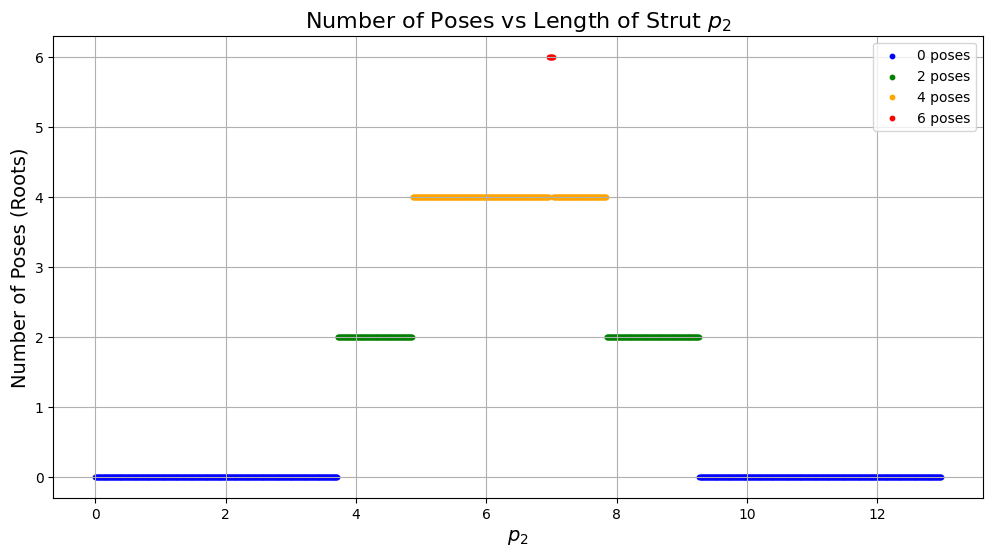


Intervals with 0 poses:
  p2 from 0.00 to 3.71
  p2 from 9.27 to infinity

Intervals with 2 poses:
  p2 from 3.72 to 4.86
  p2 from 7.85 to 9.26

Intervals with 4 poses:
  p2 from 4.87 to 6.96
  p2 from 7.03 to 7.84

Intervals with 6 poses:
  p2 from 6.97 to 7.02


In [170]:
def count_roots(constants, theta_min=-np.pi, theta_max=np.pi, num_points=1000):
    """
    Counts roots of f(theta) = 0 within [theta_min, theta_max].

    Parameters:
    constants (Constants): Stewart platform constants.
    theta_min (float): Lower bound of theta.
    theta_max (float): Upper bound of theta.
    num_points (int): Sampling points.

    Returns:
    int: Number of unique roots.
    list: Root values.
    """
    theta_vals = np.linspace(theta_min, theta_max, num_points)
    
    # Evaluate f(theta) over the range
    f_vals = np.array([f(theta, constants) for theta in theta_vals])
    
    roots = []
    
    # Detect sign changes indicating roots
    for i in range(len(theta_vals)-1):
        if np.sign(f_vals[i]) != np.sign(f_vals[i+1]):
            try:
                root = brentq(f, theta_vals[i], theta_vals[i+1], args=(constants,))
                if theta_min <= root <= theta_max:
                    roots.append(root)
            except ValueError:
                pass  # No root in this interval
    
    # Eliminate duplicate roots
    unique_roots = []
    for r in roots:
        if not any(np.isclose(r, ur, atol=1e-5) for ur in unique_roots):
            unique_roots.append(r)
    
    return len(unique_roots), unique_roots

def find_p2_intervals(constants, p2_min, p2_max, p2_step):
    """
    Finds p2 intervals with specific numbers of roots.

    Parameters:
    constants (Constants): Stewart platform constants.
    p2_min (float): Starting p2 value.
    p2_max (float): Ending p2 value.
    p2_step (float): Increment step for p2.

    Returns:
    dict: Pose counts as keys and p2 lists as values.
    """
    p2_values = np.arange(p2_min, p2_max + p2_step, p2_step)
    root_counts = {0: [], 2: [], 4: [], 6: []}
    
    for p2 in p2_values:
        constants.p2 = p2
        num_roots, _ = count_roots(constants)
        if num_roots in root_counts:
            root_counts[num_roots].append(p2)
    
    return root_counts

#### 4. Implement Problem 7

# Initialize constants
constants = Constants(
    l1=3, 
    l2=3 * np.sqrt(2), 
    l3=3, 
    gamma=np.pi / 4, 
    x1=5, 
    x2=0, 
    y2=6,  
    p1=5, 
    p2=5,  # Initial p2; will be varied
    p3=3
)

# Set p2 range
p2_min = 0.0
p2_max = 12.98  # Extended to capture p2 >= 9.27
p2_step = 0.01

# Get root counts
root_counts = find_p2_intervals(constants, p2_min, p2_max, p2_step)

# Plotting
plt.figure(figsize=(12, 6))
colors = {0: 'blue', 2: 'green', 4: 'orange', 6: 'red'}

for num_roots, p2_list in root_counts.items():
    plt.scatter(p2_list, [num_roots]*len(p2_list), label=f'{num_roots} poses', s=10, color=colors.get(num_roots, 'grey'))

plt.xlabel('$p_2$', fontsize=14)
plt.ylabel('Number of Poses (Roots)', fontsize=14)
plt.title('Number of Poses vs Length of Strut $p_2$', fontsize=16)
plt.legend()
plt.grid(True)

plt.savefig('p7_function_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify intervals
intervals_dict = {0: [], 2: [], 4: [], 6: []}
tol = 1e-6  # Tolerance for precision

for num_roots, p2_list in root_counts.items():
    if p2_list:
        p2_sorted = np.sort(p2_list)
        diffs = np.diff(p2_sorted)
        split_indices = np.where(diffs > (p2_step + tol))[0] + 1
        intervals = np.split(p2_sorted, split_indices)
        
        for interval in intervals:
            p2_start, p2_end = interval[0], interval[-1]
            intervals_dict[num_roots].append((p2_start, p2_end))

# Print first and last intervals for each pose count
for num_roots, intervals in intervals_dict.items():
    if intervals:
        print(f"\nIntervals with {num_roots} poses:")
        if len(intervals) == 1:
            p2_start, p2_end = intervals[0]
            p2_end_str = "infinity" if np.isclose(p2_end, p2_max, atol=tol) else f"{p2_end:.2f}"
            print(f"  p2 from {p2_start:.2f} to {p2_end_str}")
        else:
            # First interval
            p2_start, p2_end = intervals[0]
            p2_end_str = "infinity" if np.isclose(p2_end, p2_max, atol=tol) else f"{p2_end:.2f}"
            print(f"  p2 from {p2_start:.2f} to {p2_end_str}")
            
            # Last interval
            p2_start, p2_end = intervals[-1]
            p2_end_str = "infinity" if np.isclose(p2_end, p2_max, atol=tol) else f"{p2_end:.2f}"
            print(f"  p2 from {p2_start:.2f} to {p2_end_str}")